# Cluster Analysis

In [90]:
import pandas as pd
import geopandas as gpd
from geopandas import GeoDataFrame

In [91]:
variables = pd.read_csv('Census_neighborhoods_UDP_condensed.csv')

In [92]:
variables.reset_index()

,index,Unnamed: 0,name,geometry,GEOID,Typology,family_size_percent_change,nonfamily_size_percent_change,rent_percent_change,rent_percent_change_inflation,income_family_percent_change,income_nonfamily_percent_change,median_income_family_percent_change_inflation,median_income_nonfamily_percent_change_inflation,white_pop_percent_change,bachelorsplus_percent_change
0,0,0,Westlake,"POLYGON ((-118.259080190068 34.0538938556827, ...",6.037210e+09,Advanced Gentrification,-0.071749,1.891719,0.520134,0.120032,0.065907,0.712568,-0.148797,0.367608,0.648831,0.916215
1,1,1,Westlake,"POLYGON ((-118.259080190068 34.0538938556827, ...",6.037209e+09,Early/Ongoing Gentrification,-0.119394,0.402517,0.270859,-0.063634,0.376511,0.009882,0.099242,-0.193537,-0.126527,0.011439
2,2,2,Westlake,"POLYGON ((-118.259080190068 34.0538938556827, ...",6.037211e+09,Early/Ongoing Gentrification,-0.024494,1.193023,0.444040,0.063966,0.190279,0.329279,-0.049477,0.061524,0.899744,0.113059
3,3,3,Westlake,"POLYGON ((-118.259080190068 34.0538938556827, ...",6.037193e+09,Early/Ongoing Gentrification,0.059836,0.677729,0.579470,0.163751,0.384261,1.378870,0.105431,0.899697,0.545329,0.577466
4,4,4,Westlake,"POLYGON ((-118.259080190068 34.0538938556827, ...",6.037208e+09,At Risk of Gentrification,0.085038,1.574677,0.361851,0.003410,0.682266,3.261550,0.343410,2.403152,0.975671,0.734777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,152,152,Pico-Union,"POLYGON ((-118.281458193635 34.0525018538312, ...",6.037221e+09,At Risk of Gentrification,0.006490,3.436442,0.510638,0.113036,0.497703,-1.000000,0.196023,-1.000000,0.270798,0.645893
153,153,153,Pico-Union,"POLYGON ((-118.281458193635 34.0525018538312, ...",6.037210e+09,Advanced Gentrification,0.034523,2.287994,0.253197,-0.076647,0.688634,-0.040333,0.348495,-0.233638,1.007048,0.903833
154,154,154,Pico-Union,"POLYGON ((-118.281458193635 34.0525018538312, ...",6.037210e+09,At Risk of Gentrification,-0.033675,4.414485,0.458671,0.074746,0.181293,0.413179,-0.056653,0.128524,0.229048,0.036598
155,155,155,Pico-Union,"POLYGON ((-118.281458193635 34.0525018538312, ...",6.037210e+09,At Risk of Gentrification,-0.044453,2.212105,0.305128,-0.038384,0.030279,0.101760,-0.177249,-0.120166,1.656966,1.113294


In [93]:
variables = variables.drop(columns={'Unnamed: 0'})

In [94]:
type(variables)

pandas.core.frame.DataFrame

In [95]:
variables.geometry

0      POLYGON ((-118.259080190068 34.0538938556827, ...
1      POLYGON ((-118.259080190068 34.0538938556827, ...
2      POLYGON ((-118.259080190068 34.0538938556827, ...
3      POLYGON ((-118.259080190068 34.0538938556827, ...
4      POLYGON ((-118.259080190068 34.0538938556827, ...
                             ...                        
152    POLYGON ((-118.281458193635 34.0525018538312, ...
153    POLYGON ((-118.281458193635 34.0525018538312, ...
154    POLYGON ((-118.281458193635 34.0525018538312, ...
155    POLYGON ((-118.281458193635 34.0525018538312, ...
156    POLYGON ((-118.281458193635 34.0525018538312, ...
Name: geometry, Length: 157, dtype: object

In [96]:
variables['geometry'] = gpd.GeoSeries.from_wkt(variables['geometry'])
variablesGdf = gpd.GeoDataFrame(variables, geometry='geometry')

In [97]:
type(variablesGdf)

geopandas.geodataframe.GeoDataFrame

In [98]:
variablesGdf

,name,geometry,GEOID,Typology,family_size_percent_change,nonfamily_size_percent_change,rent_percent_change,rent_percent_change_inflation,income_family_percent_change,income_nonfamily_percent_change,median_income_family_percent_change_inflation,median_income_nonfamily_percent_change_inflation,white_pop_percent_change,bachelorsplus_percent_change
0,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6.037210e+09,Advanced Gentrification,-0.071749,1.891719,0.520134,0.120032,0.065907,0.712568,-0.148797,0.367608,0.648831,0.916215
1,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6.037209e+09,Early/Ongoing Gentrification,-0.119394,0.402517,0.270859,-0.063634,0.376511,0.009882,0.099242,-0.193537,-0.126527,0.011439
2,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6.037211e+09,Early/Ongoing Gentrification,-0.024494,1.193023,0.444040,0.063966,0.190279,0.329279,-0.049477,0.061524,0.899744,0.113059
3,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6.037193e+09,Early/Ongoing Gentrification,0.059836,0.677729,0.579470,0.163751,0.384261,1.378870,0.105431,0.899697,0.545329,0.577466
4,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6.037208e+09,At Risk of Gentrification,0.085038,1.574677,0.361851,0.003410,0.682266,3.261550,0.343410,2.403152,0.975671,0.734777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Pico-Union,"POLYGON ((-118.28146 34.05250, -118.28094 34.0...",6.037221e+09,At Risk of Gentrification,0.006490,3.436442,0.510638,0.113036,0.497703,-1.000000,0.196023,-1.000000,0.270798,0.645893
153,Pico-Union,"POLYGON ((-118.28146 34.05250, -118.28094 34.0...",6.037210e+09,Advanced Gentrification,0.034523,2.287994,0.253197,-0.076647,0.688634,-0.040333,0.348495,-0.233638,1.007048,0.903833
154,Pico-Union,"POLYGON ((-118.28146 34.05250, -118.28094 34.0...",6.037210e+09,At Risk of Gentrification,-0.033675,4.414485,0.458671,0.074746,0.181293,0.413179,-0.056653,0.128524,0.229048,0.036598
155,Pico-Union,"POLYGON ((-118.28146 34.05250, -118.28094 34.0...",6.037210e+09,At Risk of Gentrification,-0.044453,2.212105,0.305128,-0.038384,0.030279,0.101760,-0.177249,-0.120166,1.656966,1.113294


In [99]:
variablesGdf.groupby('name').size()

name
Downtown       14
Echo Park      15
Koreatown      45
Pico-Union     23
Silver Lake    25
Westlake       35
dtype: int64

In [100]:
variablesGdf.groupby('Typology').size()

Typology
Advanced Gentrification                   42
At Risk of Gentrification                 22
Becoming Exclusive                         3
Early/Ongoing Gentrification              54
Low-Income/Susceptible to Displacement    16
Ongoing Displacement                      13
Stable Moderate/Mixed Income               6
Stable/Advanced Exclusive                  1
dtype: int64

## Clustering

In [101]:
variablesGdf2 = variablesGdf.drop(columns={'name', 'geometry', 'GEOID', 'Typology'})

In [102]:
from sklearn.cluster import KMeans

In [103]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(variablesGdf2)
print(kmeans)

KMeans(n_clusters=5, random_state=0)


In [104]:
kmeans.labels_

array([0, 0, 0, 0, 1, 4, 0, 4, 0, 0, 0, 4, 0, 4, 0, 0, 0, 0, 0, 0, 0, 3,
       3, 3, 2, 3, 1, 3, 0, 0, 0, 0, 2, 0, 0, 3, 4, 4, 1, 0, 0, 4, 3, 4,
       4, 0, 0, 3, 3, 0, 0, 0, 3, 1, 0, 0, 0, 1, 4, 3, 0, 0, 4, 0, 3, 0,
       0, 4, 4, 0, 3, 0, 0, 1, 0, 0, 0, 4, 0, 1, 3, 0, 0, 3, 0, 0, 3, 3,
       3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 2, 0, 0, 0, 4, 0, 3, 3, 0, 0,
       0, 0, 0, 0, 0, 4, 0, 0, 3, 3, 0, 3, 0, 0, 0, 0, 3, 0, 0, 3, 3, 0,
       3, 0, 0, 4, 4, 0, 2, 0, 0, 2, 0, 0, 0, 4, 0, 0, 0, 0, 4, 1, 3, 3,
       3, 4, 0], dtype=int32)

In [105]:
print(kmeans.labels_.shape)
print(len(variablesGdf2))

(157,)
157


In [106]:
variablesGdf['cluster_id'] = kmeans.labels_

In [107]:
variablesGdf.groupby('cluster_id').size()

cluster_id
0    92
1     8
2     5
3    31
4    21
dtype: int64

In [108]:
variablesGdf

,name,geometry,GEOID,Typology,family_size_percent_change,nonfamily_size_percent_change,rent_percent_change,rent_percent_change_inflation,income_family_percent_change,income_nonfamily_percent_change,median_income_family_percent_change_inflation,median_income_nonfamily_percent_change_inflation,white_pop_percent_change,bachelorsplus_percent_change,cluster_id
0,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6.037210e+09,Advanced Gentrification,-0.071749,1.891719,0.520134,0.120032,0.065907,0.712568,-0.148797,0.367608,0.648831,0.916215,0
1,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6.037209e+09,Early/Ongoing Gentrification,-0.119394,0.402517,0.270859,-0.063634,0.376511,0.009882,0.099242,-0.193537,-0.126527,0.011439,0
2,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6.037211e+09,Early/Ongoing Gentrification,-0.024494,1.193023,0.444040,0.063966,0.190279,0.329279,-0.049477,0.061524,0.899744,0.113059,0
3,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6.037193e+09,Early/Ongoing Gentrification,0.059836,0.677729,0.579470,0.163751,0.384261,1.378870,0.105431,0.899697,0.545329,0.577466,0
4,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6.037208e+09,At Risk of Gentrification,0.085038,1.574677,0.361851,0.003410,0.682266,3.261550,0.343410,2.403152,0.975671,0.734777,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Pico-Union,"POLYGON ((-118.28146 34.05250, -118.28094 34.0...",6.037221e+09,At Risk of Gentrification,0.006490,3.436442,0.510638,0.113036,0.497703,-1.000000,0.196023,-1.000000,0.270798,0.645893,3
153,Pico-Union,"POLYGON ((-118.28146 34.05250, -118.28094 34.0...",6.037210e+09,Advanced Gentrification,0.034523,2.287994,0.253197,-0.076647,0.688634,-0.040333,0.348495,-0.233638,1.007048,0.903833,3
154,Pico-Union,"POLYGON ((-118.28146 34.05250, -118.28094 34.0...",6.037210e+09,At Risk of Gentrification,-0.033675,4.414485,0.458671,0.074746,0.181293,0.413179,-0.056653,0.128524,0.229048,0.036598,3
155,Pico-Union,"POLYGON ((-118.28146 34.05250, -118.28094 34.0...",6.037210e+09,At Risk of Gentrification,-0.044453,2.212105,0.305128,-0.038384,0.030279,0.101760,-0.177249,-0.120166,1.656966,1.113294,4


In [109]:
cluster0 = variablesGdf[variablesGdf['cluster_id']==0]

In [110]:
print(len(cluster0))

92


In [111]:
cluster0[cluster0['name']=='Westlake']

,name,geometry,GEOID,Typology,family_size_percent_change,nonfamily_size_percent_change,rent_percent_change,rent_percent_change_inflation,income_family_percent_change,income_nonfamily_percent_change,median_income_family_percent_change_inflation,median_income_nonfamily_percent_change_inflation,white_pop_percent_change,bachelorsplus_percent_change,cluster_id
0,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6.037210e+09,Advanced Gentrification,-0.071749,1.891719,0.520134,0.120032,0.065907,0.712568,-0.148797,0.367608,0.648831,0.916215,0
1,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6.037209e+09,Early/Ongoing Gentrification,-0.119394,0.402517,0.270859,-0.063634,0.376511,0.009882,0.099242,-0.193537,-0.126527,0.011439,0
2,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6.037211e+09,Early/Ongoing Gentrification,-0.024494,1.193023,0.444040,0.063966,0.190279,0.329279,-0.049477,0.061524,0.899744,0.113059,0
3,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6.037193e+09,Early/Ongoing Gentrification,0.059836,0.677729,0.579470,0.163751,0.384261,1.378870,0.105431,0.899697,0.545329,0.577466,0
6,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6.037196e+09,Early/Ongoing Gentrification,-0.091794,0.537915,0.740093,0.282098,0.241759,1.775012,-0.008367,1.216046,0.748473,0.483924,0
8,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6.037213e+09,Early/Ongoing Gentrification,-0.007076,1.014529,0.425885,0.050590,0.082080,0.270292,-0.135881,0.014419,0.225960,0.533013,0
9,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6.037213e+09,Low-Income/Susceptible to Displacement,-0.078869,0.420745,0.402286,0.033202,-0.063256,0.272685,-0.251943,0.016330,0.944447,-0.152074,0
10,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6.037212e+09,Early/Ongoing Gentrification,0.100664,-0.005447,0.753978,0.292328,0.311524,0.175827,0.047346,-0.061018,1.147444,0.309069,0
12,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6.037212e+09,Low-Income/Susceptible to Displacement,-0.013000,0.869082,0.452730,0.070369,0.364267,0.133745,0.089464,-0.094624,0.229691,0.411891,0
14,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6.037210e+09,At Risk of Gentrification,-0.050986,0.624028,0.461832,0.077075,0.206270,0.231753,-0.036707,-0.016357,0.847204,0.261290,0


In [112]:
cluster0[cluster0['name']=='Echo Park']

,name,geometry,GEOID,Typology,family_size_percent_change,nonfamily_size_percent_change,rent_percent_change,rent_percent_change_inflation,income_family_percent_change,income_nonfamily_percent_change,median_income_family_percent_change_inflation,median_income_nonfamily_percent_change_inflation,white_pop_percent_change,bachelorsplus_percent_change,cluster_id
49,Echo Park,"POLYGON ((-118.24487 34.09569, -118.24454 34.0...",6.037198e+09,Advanced Gentrification,-0.110272,1.284955,0.978842,0.458007,0.509431,0.868628,0.205388,0.492233,0.612166,0.316261,0
50,Echo Park,"POLYGON ((-118.24487 34.09569, -118.24454 34.0...",6.037198e+09,Early/Ongoing Gentrification,-0.203189,0.766176,0.865362,0.374396,0.729159,0.699258,0.380857,0.356979,1.094552,1.199726,0
51,Echo Park,"POLYGON ((-118.24487 34.09569, -118.24454 34.0...",6.037196e+09,Advanced Gentrification,-0.197450,0.397686,0.320175,-0.027297,-0.060814,-0.060761,-0.249993,-0.249951,0.278152,0.050856,0
54,Echo Park,"POLYGON ((-118.24487 34.09569, -118.24454 34.0...",6.037196e+09,Advanced Gentrification,-0.118186,0.643344,0.218633,-0.102114,0.326262,0.175765,0.059115,-0.061067,0.113466,0.111363,0
55,Echo Park,"POLYGON ((-118.24487 34.09569, -118.24454 34.0...",6.037197e+09,Advanced Gentrification,-0.107673,1.140245,0.356240,-0.000725,1.261875,0.259848,0.806269,0.006078,0.089019,0.175833,0
56,Echo Park,"POLYGON ((-118.24487 34.09569, -118.24454 34.0...",6.037187e+09,Stable Moderate/Mixed Income,0.022075,0.585503,0.386760,0.021762,0.482239,0.120414,0.183674,-0.105269,0.040701,0.286868,0
60,Echo Park,"POLYGON ((-118.24487 34.09569, -118.24454 34.0...",6.037196e+09,Early/Ongoing Gentrification,-0.014936,0.124610,0.264650,-0.068208,2.023106,0.073515,1.414166,-0.142721,0.909143,0.803184,0
61,Echo Park,"POLYGON ((-118.24487 34.09569, -118.24454 34.0...",6.037196e+09,Early/Ongoing Gentrification,-0.091794,0.537915,0.740093,0.282098,0.241759,1.775012,-0.008367,1.216046,0.748473,0.483924,0
63,Echo Park,"POLYGON ((-118.24487 34.09569, -118.24454 34.0...",6.037196e+09,Advanced Gentrification,-0.107716,0.366543,0.390873,0.024793,-1.000000,0.104177,-1.000000,-0.118235,0.366421,0.786072,0


In [113]:
cluster0[cluster0['name']=='Koreatown']

,name,geometry,GEOID,Typology,family_size_percent_change,nonfamily_size_percent_change,rent_percent_change,rent_percent_change_inflation,income_family_percent_change,income_nonfamily_percent_change,median_income_family_percent_change_inflation,median_income_nonfamily_percent_change_inflation,white_pop_percent_change,bachelorsplus_percent_change,cluster_id
89,Koreatown,"POLYGON ((-118.28785 34.06182, -118.28783 34.0...",6.037213e+09,Low-Income/Susceptible to Displacement,0.037946,0.760865,0.244054,-0.083383,0.078887,0.293114,-0.138432,0.032644,0.437042,0.353379,0
90,Koreatown,"POLYGON ((-118.28785 34.06182, -118.28783 34.0...",6.037213e+09,Low-Income/Susceptible to Displacement,0.047465,0.634546,0.251902,-0.077601,0.084471,0.675845,-0.133972,0.338282,0.193650,0.263152,0
91,Koreatown,"POLYGON ((-118.28785 34.06182, -118.28783 34.0...",6.037213e+09,Advanced Gentrification,-0.009756,1.594897,0.340741,-0.012145,0.246441,0.283186,-0.004628,0.024715,0.030496,-0.145954,0
92,Koreatown,"POLYGON ((-118.28785 34.06182, -118.28783 34.0...",6.037211e+09,Low-Income/Susceptible to Displacement,0.102183,0.862543,0.496629,0.102714,1.306239,0.313879,0.841696,0.049226,0.413720,0.430423,0
93,Koreatown,"POLYGON ((-118.28785 34.06182, -118.28783 34.0...",6.037211e+09,Early/Ongoing Gentrification,-0.024494,1.193023,0.444040,0.063966,0.190279,0.329279,-0.049477,0.061524,0.899744,0.113059,0
94,Koreatown,"POLYGON ((-118.28785 34.06182, -118.28783 34.0...",6.037211e+09,Ongoing Displacement,0.097094,0.597801,0.407266,0.036871,0.866694,0.510336,0.490689,0.206111,0.621137,-0.159828,0
95,Koreatown,"POLYGON ((-118.28785 34.06182, -118.28783 34.0...",6.037211e+09,Early/Ongoing Gentrification,-0.086750,1.687500,0.437018,0.058792,0.688125,0.187381,0.348088,-0.051792,0.625835,0.419283,0
96,Koreatown,"POLYGON ((-118.28785 34.06182, -118.28783 34.0...",6.037192e+09,Advanced Gentrification,0.068885,1.337282,0.432043,0.055127,0.294731,0.250000,0.033935,-0.001786,0.563393,0.456675,0
98,Koreatown,"POLYGON ((-118.28785 34.06182, -118.28783 34.0...",6.037193e+09,Ongoing Displacement,0.038893,0.646000,0.364583,0.005423,0.716732,0.261922,0.370933,0.007735,0.621414,0.762365,0
99,Koreatown,"POLYGON ((-118.28785 34.06182, -118.28783 34.0...",6.037193e+09,Early/Ongoing Gentrification,0.059836,0.677729,0.579470,0.163751,0.384261,1.378870,0.105431,0.899697,0.545329,0.577466,0


In [114]:
cluster0.groupby('name').size()

name
Downtown        4
Echo Park       9
Koreatown      32
Pico-Union     12
Silver Lake    13
Westlake       22
dtype: int64

In [115]:
cluster0.groupby('Typology').size()

Typology
Advanced Gentrification                   23
At Risk of Gentrification                 10
Becoming Exclusive                         1
Early/Ongoing Gentrification              40
Low-Income/Susceptible to Displacement    10
Ongoing Displacement                       4
Stable Moderate/Mixed Income               3
Stable/Advanced Exclusive                  1
dtype: int64

In [116]:
cluster1 = variablesGdf[variablesGdf['cluster_id']==1]

In [117]:
cluster1.groupby('name').size()

name
Downtown       1
Echo Park      2
Pico-Union     1
Silver Lake    2
Westlake       2
dtype: int64

In [118]:
cluster1.groupby('Typology').size()

Typology
Advanced Gentrification                   3
At Risk of Gentrification                 2
Early/Ongoing Gentrification              1
Low-Income/Susceptible to Displacement    1
Ongoing Displacement                      1
dtype: int64

In [119]:
cluster2 = variablesGdf[variablesGdf['cluster_id']==2]

In [120]:
cluster2.groupby('name').size()

name
Koreatown     1
Pico-Union    2
Westlake      2
dtype: int64

In [121]:
cluster2.groupby('Typology').size()

Typology
Early/Ongoing Gentrification              2
Low-Income/Susceptible to Displacement    2
Ongoing Displacement                      1
dtype: int64

In [122]:
cluster3 = variablesGdf[variablesGdf['cluster_id']==3]

In [123]:
cluster3.groupby('name').size()

name
Downtown        4
Echo Park       2
Koreatown      10
Pico-Union      3
Silver Lake     7
Westlake        5
dtype: int64

In [124]:
cluster3.groupby('Typology').size()

Typology
Advanced Gentrification                    8
At Risk of Gentrification                  5
Becoming Exclusive                         2
Early/Ongoing Gentrification              10
Low-Income/Susceptible to Displacement     1
Ongoing Displacement                       2
Stable Moderate/Mixed Income               3
dtype: int64

In [125]:
cluster4 = variablesGdf[variablesGdf['cluster_id']==4]

In [126]:
cluster4.groupby('name').size()

name
Downtown       5
Echo Park      2
Koreatown      2
Pico-Union     5
Silver Lake    3
Westlake       4
dtype: int64

In [127]:
cluster4.groupby('Typology').size()

Typology
Advanced Gentrification                   8
At Risk of Gentrification                 5
Early/Ongoing Gentrification              1
Low-Income/Susceptible to Displacement    2
Ongoing Displacement                      5
dtype: int64

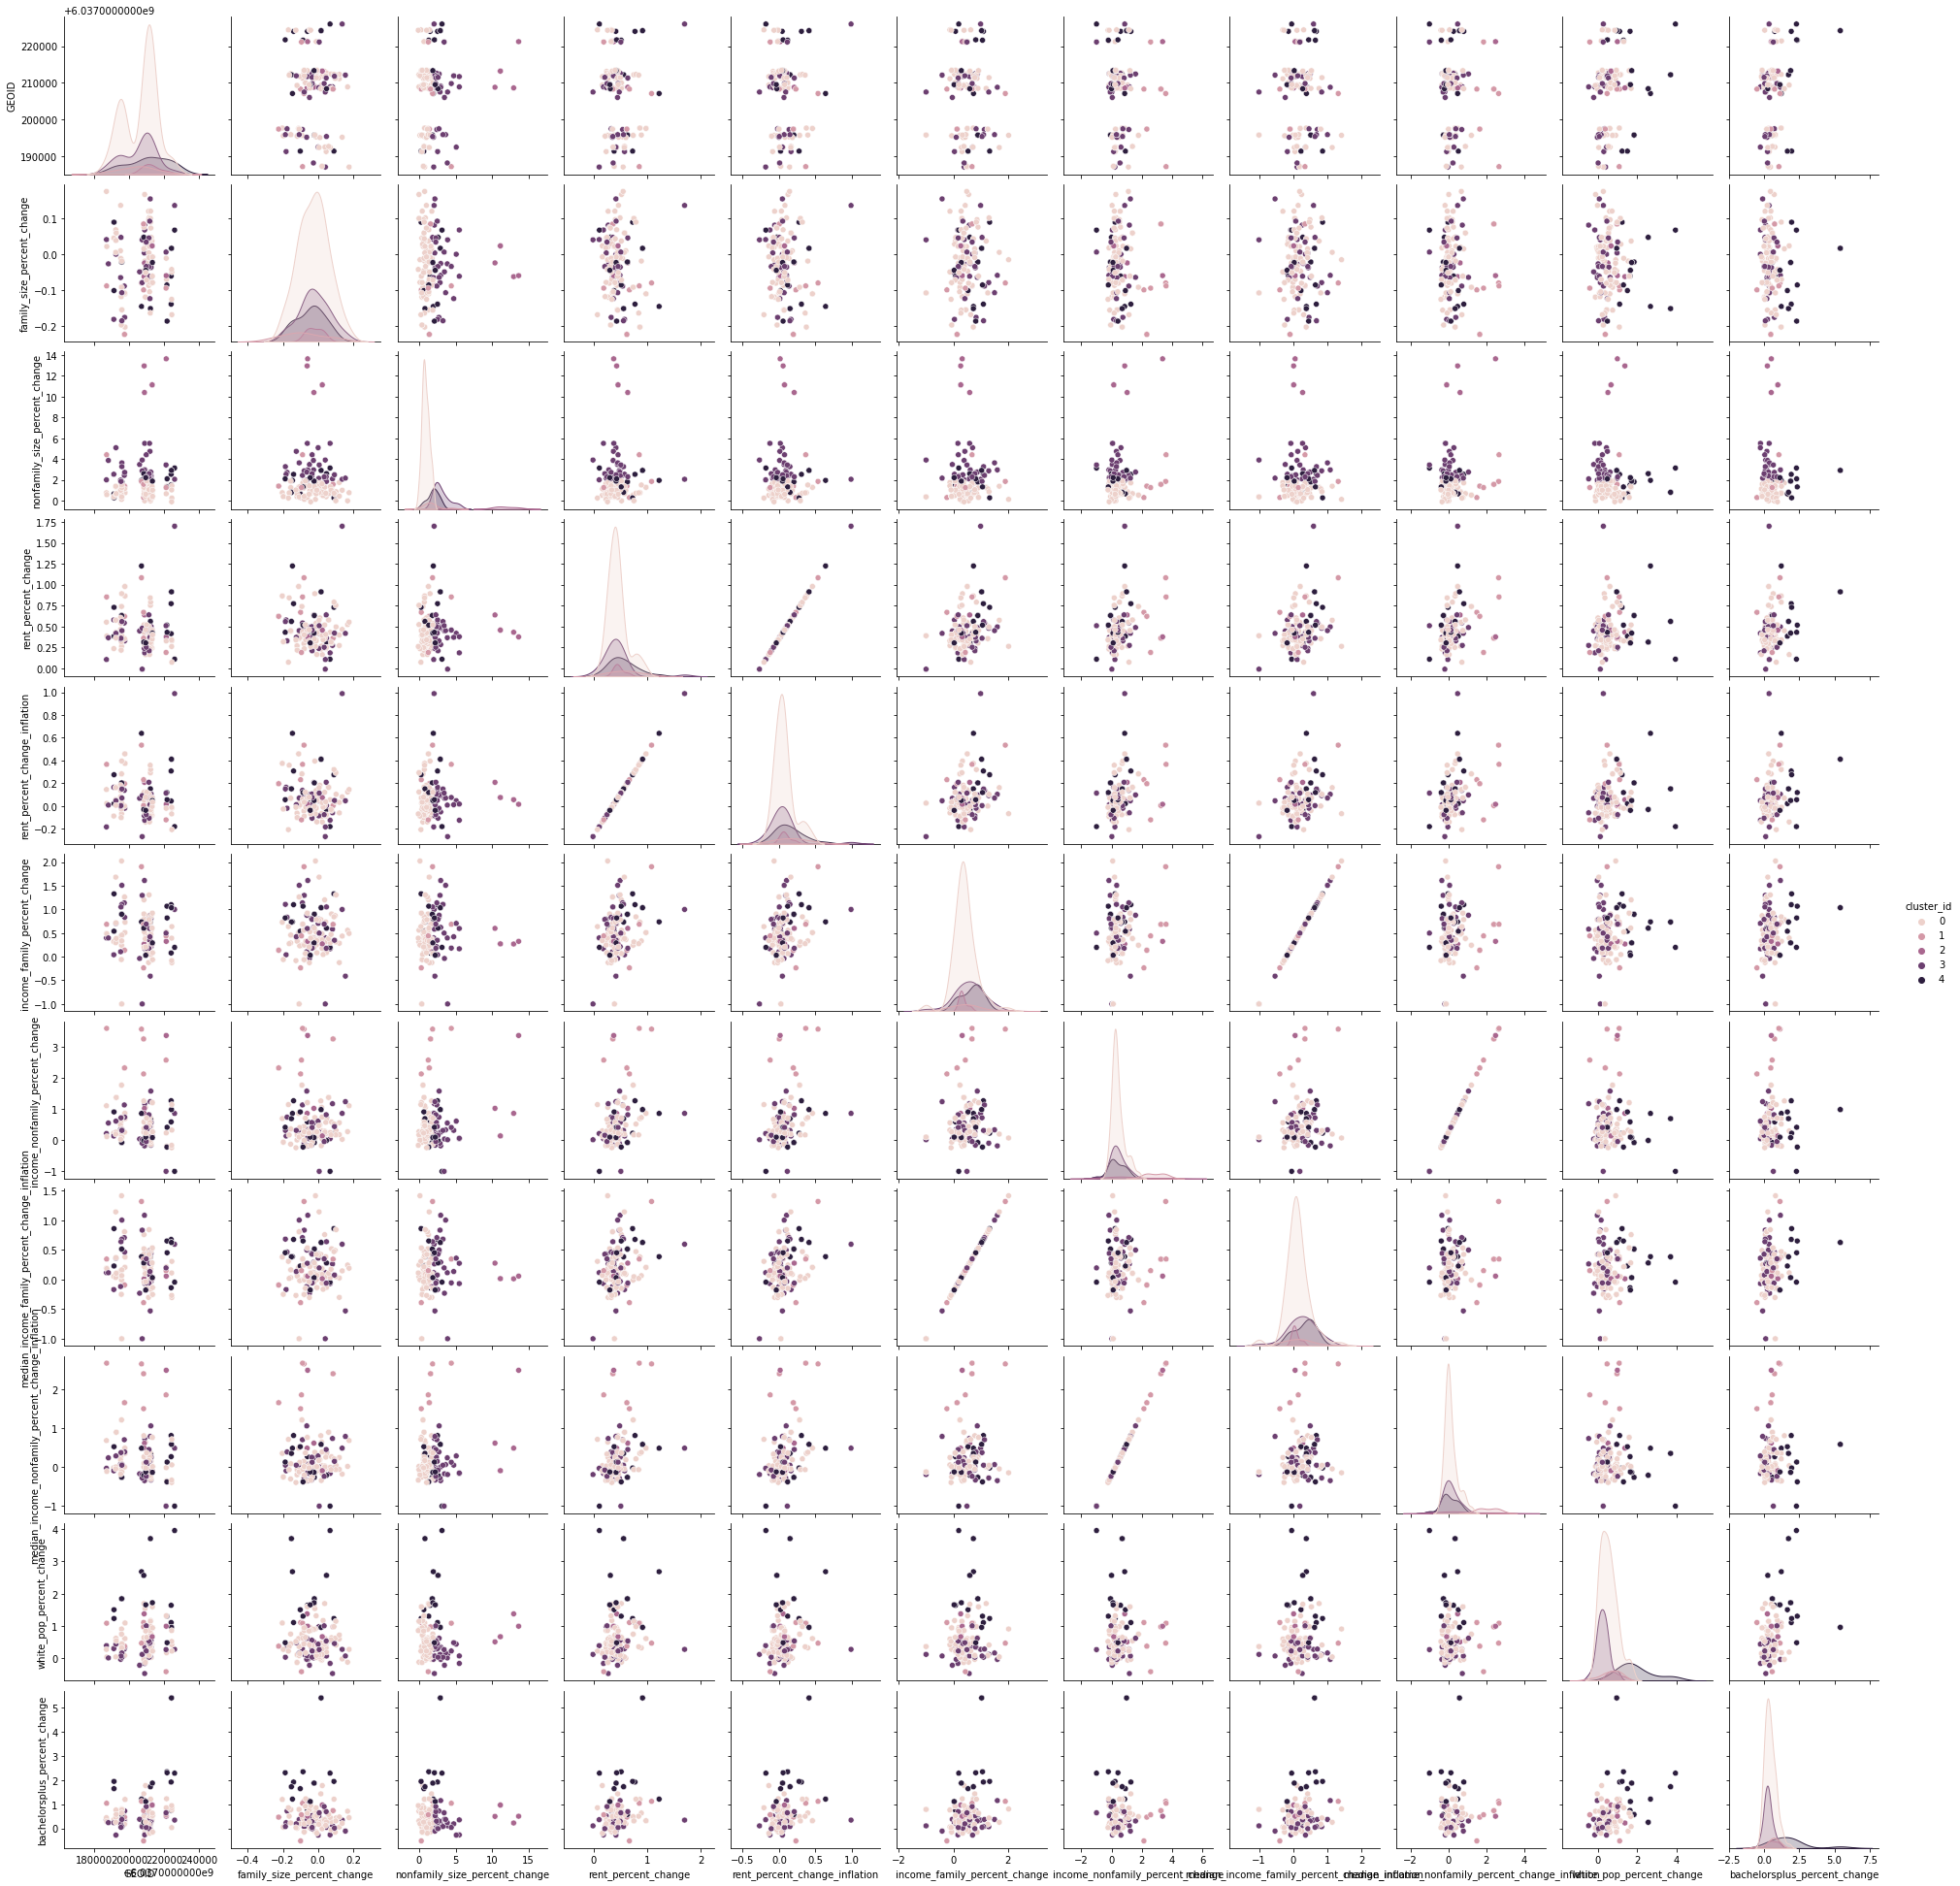

In [128]:
import seaborn as sns
ax = sns.pairplot(variablesGdf, hue='cluster_id', )

In [129]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.patches import Circle, RegularPolygon
from matplotlib.path import Path
from matplotlib.projections.polar import PolarAxes
from matplotlib.projections import register_projection
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D


def radar_factory(num_vars, frame='circle'):
    """
    Create a radar chart with `num_vars` axes.

    This function creates a RadarAxes projection and registers it.

    Parameters
    ----------
    num_vars : int
        Number of variables for radar chart.
    frame : {'circle', 'polygon'}
        Shape of frame surrounding axes.

    """
    # calculate evenly-spaced axis angles
    theta = np.linspace(0, 2*np.pi, num_vars, endpoint=False)

    class RadarAxes(PolarAxes):

        name = 'radar'
        # use 1 line segment to connect specified points
        RESOLUTION = 1

        def __init__(self, *args, **kwargs):
            super().__init__(*args, **kwargs)
            # rotate plot such that the first axis is at the top
            self.set_theta_zero_location('N')

        def fill(self, *args, closed=True, **kwargs):
            """Override fill so that line is closed by default"""
            return super().fill(closed=closed, *args, **kwargs)

        def plot(self, *args, **kwargs):
            """Override plot so that line is closed by default"""
            lines = super().plot(*args, **kwargs)
            for line in lines:
                self._close_line(line)

        def _close_line(self, line):
            x, y = line.get_data()
            # FIXME: markers at x[0], y[0] get doubled-up
            if x[0] != x[-1]:
                x = np.append(x, x[0])
                y = np.append(y, y[0])
                line.set_data(x, y)

        def set_varlabels(self, labels):
            self.set_thetagrids(np.degrees(theta), labels)

        def _gen_axes_patch(self):
            # The Axes patch must be centered at (0.5, 0.5) and of radius 0.5
            # in axes coordinates.
            if frame == 'circle':
                return Circle((0.5, 0.5), 0.5)
            elif frame == 'polygon':
                return RegularPolygon((0.5, 0.5), num_vars,
                                      radius=.5, edgecolor="k")
            else:
                raise ValueError("Unknown value for 'frame': %s" % frame)

        def _gen_axes_spines(self):
            if frame == 'circle':
                return super()._gen_axes_spines()
            elif frame == 'polygon':
                # spine_type must be 'left'/'right'/'top'/'bottom'/'circle'.
                spine = Spine(axes=self,
                              spine_type='circle',
                              path=Path.unit_regular_polygon(num_vars))
                # unit_regular_polygon gives a polygon of radius 1 centered at
                # (0, 0) but we want a polygon of radius 0.5 centered at (0.5,
                # 0.5) in axes coordinates.
                spine.set_transform(Affine2D().scale(.5).translate(.5, .5)
                                    + self.transAxes)
                return {'polar': spine}
            else:
                raise ValueError("Unknown value for 'frame': %s" % frame)

    register_projection(RadarAxes)
    return theta


In [130]:
def radar_plot(kmeans, variablesGdf2):
    N  = kmeans.cluster_centers_.shape[1]  # number of columns / variables
    k = kmeans.n_clusters
    theta = radar_factory(N, frame='polygon')
    data = kmeans.cluster_centers_.T
    spoke_labels = [col for col in variablesGdf2.columns if col!='cluster_id']
    fig, ax = plt.subplots(figsize=(9, 9),
                                subplot_kw=dict(projection='radar'))
    fig.subplots_adjust(wspace=0.25, hspace=0.20, top=0.85, bottom=0.05)

    ax.plot(theta, data) #, color=color)
    ax.set_varlabels(spoke_labels)

    # add legend relative to top-left plot
    labels = ['Cluster {}'.format(kk) for kk in range(k)]
    ax.legend(labels, loc=(0.9, .95),
                                labelspacing=0.1, fontsize='small')

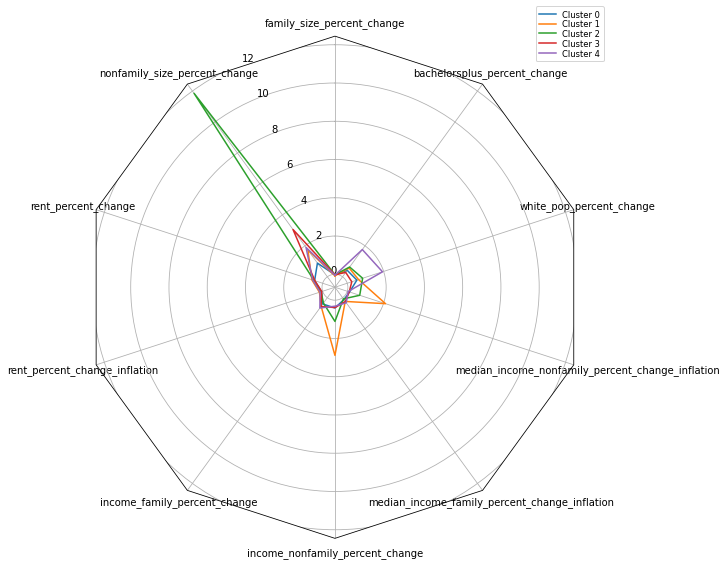

In [131]:
radar_plot (kmeans, variablesGdf2)

## Cluster Round 2

In [132]:
kmeans = KMeans(n_clusters=10, random_state=0).fit(variablesGdf2)

In [133]:
print(kmeans.labels_.shape)
print(len(variablesGdf2))

(157,)
157


In [134]:
variablesGdf['cluster_id2'] = kmeans.labels_

In [135]:
variablesGdf.groupby('cluster_id2').size()

cluster_id2
0    18
1     4
2    33
3    16
4    53
5     2
6     9
7     4
8    17
9     1
dtype: int64

In [136]:
variablesGdf

,name,geometry,GEOID,Typology,family_size_percent_change,nonfamily_size_percent_change,rent_percent_change,rent_percent_change_inflation,income_family_percent_change,income_nonfamily_percent_change,median_income_family_percent_change_inflation,median_income_nonfamily_percent_change_inflation,white_pop_percent_change,bachelorsplus_percent_change,cluster_id,cluster_id2
0,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6.037210e+09,Advanced Gentrification,-0.071749,1.891719,0.520134,0.120032,0.065907,0.712568,-0.148797,0.367608,0.648831,0.916215,0,2
1,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6.037209e+09,Early/Ongoing Gentrification,-0.119394,0.402517,0.270859,-0.063634,0.376511,0.009882,0.099242,-0.193537,-0.126527,0.011439,0,4
2,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6.037211e+09,Early/Ongoing Gentrification,-0.024494,1.193023,0.444040,0.063966,0.190279,0.329279,-0.049477,0.061524,0.899744,0.113059,0,4
3,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6.037193e+09,Early/Ongoing Gentrification,0.059836,0.677729,0.579470,0.163751,0.384261,1.378870,0.105431,0.899697,0.545329,0.577466,0,0
4,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0...",6.037208e+09,At Risk of Gentrification,0.085038,1.574677,0.361851,0.003410,0.682266,3.261550,0.343410,2.403152,0.975671,0.734777,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Pico-Union,"POLYGON ((-118.28146 34.05250, -118.28094 34.0...",6.037221e+09,At Risk of Gentrification,0.006490,3.436442,0.510638,0.113036,0.497703,-1.000000,0.196023,-1.000000,0.270798,0.645893,3,6
153,Pico-Union,"POLYGON ((-118.28146 34.05250, -118.28094 34.0...",6.037210e+09,Advanced Gentrification,0.034523,2.287994,0.253197,-0.076647,0.688634,-0.040333,0.348495,-0.233638,1.007048,0.903833,3,2
154,Pico-Union,"POLYGON ((-118.28146 34.05250, -118.28094 34.0...",6.037210e+09,At Risk of Gentrification,-0.033675,4.414485,0.458671,0.074746,0.181293,0.413179,-0.056653,0.128524,0.229048,0.036598,3,6
155,Pico-Union,"POLYGON ((-118.28146 34.05250, -118.28094 34.0...",6.037210e+09,At Risk of Gentrification,-0.044453,2.212105,0.305128,-0.038384,0.030279,0.101760,-0.177249,-0.120166,1.656966,1.113294,4,3


In [137]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.patches import Circle, RegularPolygon
from matplotlib.path import Path
from matplotlib.projections.polar import PolarAxes
from matplotlib.projections import register_projection
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D


def radar_factory(num_vars, frame='circle'):
    """
    Create a radar chart with `num_vars` axes.

    This function creates a RadarAxes projection and registers it.

    Parameters
    ----------
    num_vars : int
        Number of variables for radar chart.
    frame : {'circle', 'polygon'}
        Shape of frame surrounding axes.

    """
    # calculate evenly-spaced axis angles
    theta = np.linspace(0, 2*np.pi, num_vars, endpoint=False)

    class RadarAxes(PolarAxes):

        name = 'radar'
        # use 1 line segment to connect specified points
        RESOLUTION = 1

        def __init__(self, *args, **kwargs):
            super().__init__(*args, **kwargs)
            # rotate plot such that the first axis is at the top
            self.set_theta_zero_location('N')

        def fill(self, *args, closed=True, **kwargs):
            """Override fill so that line is closed by default"""
            return super().fill(closed=closed, *args, **kwargs)

        def plot(self, *args, **kwargs):
            """Override plot so that line is closed by default"""
            lines = super().plot(*args, **kwargs)
            for line in lines:
                self._close_line(line)

        def _close_line(self, line):
            x, y = line.get_data()
            # FIXME: markers at x[0], y[0] get doubled-up
            if x[0] != x[-1]:
                x = np.append(x, x[0])
                y = np.append(y, y[0])
                line.set_data(x, y)

        def set_varlabels(self, labels):
            self.set_thetagrids(np.degrees(theta), labels)

        def _gen_axes_patch(self):
            # The Axes patch must be centered at (0.5, 0.5) and of radius 0.5
            # in axes coordinates.
            if frame == 'circle':
                return Circle((0.5, 0.5), 0.5)
            elif frame == 'polygon':
                return RegularPolygon((0.5, 0.5), num_vars,
                                      radius=.5, edgecolor="k")
            else:
                raise ValueError("Unknown value for 'frame': %s" % frame)

        def _gen_axes_spines(self):
            if frame == 'circle':
                return super()._gen_axes_spines()
            elif frame == 'polygon':
                # spine_type must be 'left'/'right'/'top'/'bottom'/'circle'.
                spine = Spine(axes=self,
                              spine_type='circle',
                              path=Path.unit_regular_polygon(num_vars))
                # unit_regular_polygon gives a polygon of radius 1 centered at
                # (0, 0) but we want a polygon of radius 0.5 centered at (0.5,
                # 0.5) in axes coordinates.
                spine.set_transform(Affine2D().scale(.5).translate(.5, .5)
                                    + self.transAxes)
                return {'polar': spine}
            else:
                raise ValueError("Unknown value for 'frame': %s" % frame)

    register_projection(RadarAxes)
    return theta

In [138]:
def radar_plot(kmeans, variablesGdf2):
    N  = kmeans.cluster_centers_.shape[1]  # number of columns / variables
    k = kmeans.n_clusters
    theta = radar_factory(N, frame='polygon')
    data = kmeans.cluster_centers_.T
    spoke_labels = [col for col in variablesGdf2.columns if col!='cluster_id']
    fig, ax = plt.subplots(figsize=(9, 9),
                                subplot_kw=dict(projection='radar'))
    fig.subplots_adjust(wspace=0.25, hspace=0.20, top=0.85, bottom=0.05)

    ax.plot(theta, data) #, color=color)
    ax.set_varlabels(spoke_labels)

    # add legend relative to top-left plot
    labels = ['Cluster {}'.format(kk) for kk in range(k)]
    ax.legend(labels, loc=(0.9, .95),
                                labelspacing=0.1, fontsize='small')

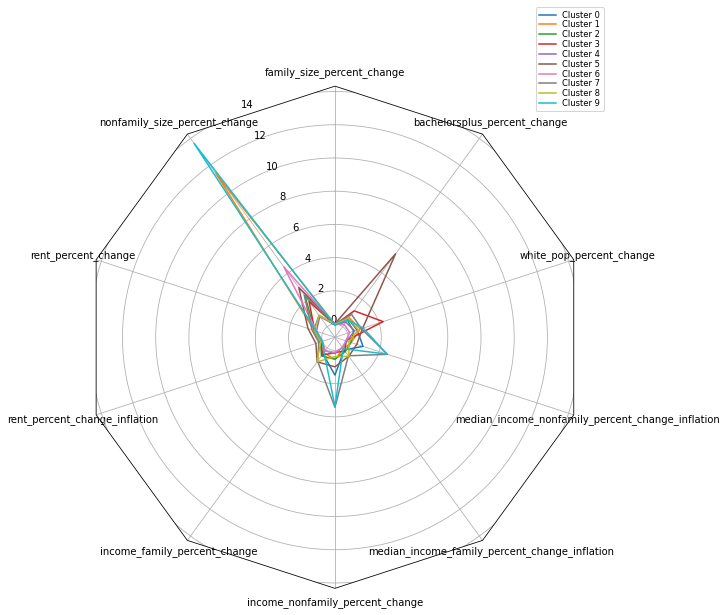

In [139]:
radar_plot (kmeans, variablesGdf2)